<a href="https://colab.research.google.com/github/babaroscopy/Thesis/blob/main/Thesis_code_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

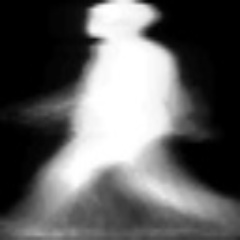

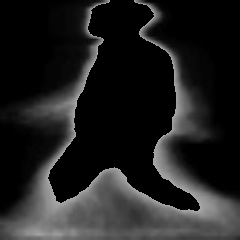

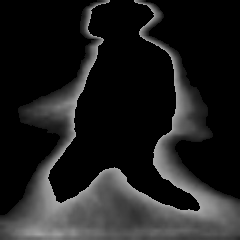

In [2]:
import cv2
from google.colab.patches import cv2_imshow
input_image = cv2.imread('/content/Person-001-nm-01.jpg')
threshold_value = 167
max_val = 255
cv2_imshow(input_image)
ret, image = cv2.threshold(input_image, threshold_value, max_val, cv2.THRESH_TOZERO_INV)
#cv2.imshow('InverseZeroThresholding', image)
cv2_imshow(image)
t_val=20
ret, out_image = cv2.threshold(image, t_val, max_val, cv2.THRESH_TOZERO)
cv2_imshow(out_image)

In [ ]:
# get dimensions of image
dimensions = input_image.shape

print('Image Dimension    : ',dimensions)
# get dimensions of image
dimensions = out_image.shape

print('Image Dimension    : ',dimensions)

Image Dimension    :  (240, 240, 3)
Image Dimension    :  (240, 240, 3)


In [ ]:
input_image = input_image.mean(axis=-1, keepdims=True)
# get dimensions of image
dimensions = input_image.shape

print('Image Dimension    : ',dimensions)
out_image = out_image.mean(axis=-1, keepdims=True)
# get dimensions of image
dimensions = out_image.shape

print('Image Dimension    : ',dimensions)

Image Dimension    :  (240, 240, 1)
Image Dimension    :  (240, 240, 1)


Learning a kernel/filter of 3*3 which changes input matrices to output matrices, where output matrices are simply thrshold to binary inverted GEIs

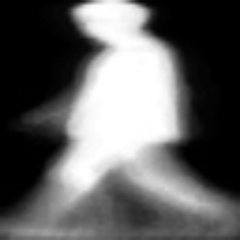

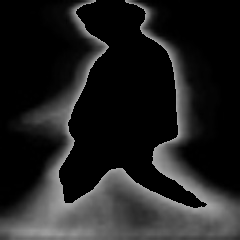

Epoch 1/100
16/16 [==============================] - 5s 288ms/step - loss: 2858.5178
Epoch 2/100
16/16 [==============================] - 5s 282ms/step - loss: 2774.8657
Epoch 3/100
16/16 [==============================] - 4s 266ms/step - loss: 2770.4807
Epoch 4/100
16/16 [==============================] - 5s 323ms/step - loss: 2769.2993
Epoch 5/100
16/16 [==============================] - 4s 265ms/step - loss: 2768.7236
Epoch 6/100
16/16 [==============================] - 4s 259ms/step - loss: 2767.9719
Epoch 7/100
16/16 [==============================] - 5s 314ms/step - loss: 2767.8428
Epoch 8/100
16/16 [==============================] - 4s 260ms/step - loss: 2767.0886
Epoch 9/100
16/16 [==============================] - 5s 323ms/step - loss: 2766.3176
Epoch 10/100
16/16 [==============================] - 4s 260ms/step - loss: 2765.8962
Epoch 11/100
16/16 [==============================] - 4s 258ms/step - loss: 2765.3572
Epoch 12/100
16/16 [==============================] - 5s 317ms/

In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Define input and output shapes
input_shape = (240, 240, 1)
output_shape = (240, 240, 1)

# Define input and output image directories
input_dir = '/content/input_folder/'
#output_dir = 'D:/Study/MS/Thesis/GaitRecognition/GaitRecognition/Experiment#01(GEI)/out_TrainNormal/'

# Get a list of input image filenames
input_filenames = os.listdir(input_dir)

# Load input and output images and apply manual operation
X_train = []
Y_train = []
for input_filename in input_filenames:
    # Load input image and resize to desired shape
    input_image = cv2.imread(os.path.join(input_dir, input_filename), cv2.IMREAD_GRAYSCALE)
    input_image = cv2.resize(input_image, input_shape[:2])
    X_train.append(input_image)
    # Threshold input image and invert it
    out_image = cv2.threshold(input_image, 167, 255, cv2.THRESH_TOZERO_INV)[1]
    # Reshape input image to match model input shape
    out_image = np.reshape(out_image, output_shape)
    Y_train.append(out_image)

cv2_imshow(X_train[1])
cv2_imshow(Y_train[1])

# Convert input and output images to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Create a sequential model
model = tf.keras.models.Sequential()

# Add a convolution layer with a 3x3 kernel and same padding
model.add(tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='same', input_shape=input_shape))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the input and output data
model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Get the learned kernel weights
kernel_weights = model.get_weights()[0]

# Print the learned kernel weights
print(kernel_weights)


Using Learned 3*3 filter above to be used as initial kernel in first layer of deep learning model

In [7]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from imageio import imread
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,LeakyReLU,BatchNormalization
from keras.applications import densenet
from keras.regularizers import l1
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.layers import ZeroPadding2D
from matplotlib import pyplot
import sys
import numpy
import tensorflow as tf 
from numpy import asarray
numpy.set_printoptions(threshold=sys.maxsize)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

images1 = "/content/input_folder"
files1= os.listdir(images1)
print(files1)
X_train = [imread('/content/input_folder/'+f) for f in files1]   # Getting Training Images
for f in files1:
    Y_train.append(f[7:10])
for i in range(0, len(Y_train)):
    Y_train[i] = int(Y_train[i])
print(Y_train)
images2 = '/content/test'
files2= os.listdir(images2)
print(files2)
X_test = [imread("/content/test/"+f) for f in files2]
for f in files2:
    Y_test.append(f[7:10])

for i in range(0, len(Y_test)):
    Y_test[i] = int(Y_test[i])
print(Y_test)

X_train=np.array(X_train)
X_test=np.array(X_test)

img_rows=240
img_cols=240
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test=label_encoder.fit_transform(Y_test)
Y_train= label_encoder.fit_transform(Y_train)

print(Y_train)
print(Y_test)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = 124
epochs = 25
MODEL_NAME = 'TrainedModelFile-{}-{}.model'.format("0.0001", 'TenLayers')
# Define the custom kernel weights for the first layer
first_kernel_weights = [[0.4810368,0.08445502,-0.6010842], [-0.11656433,0.35980093,0.32648125], [-0.49533835,0.15650545,0.00591885]]
model = Sequential()
model.add(Conv2D(1,3, 3,input_shape=(240, 240, 1),
                           padding='same',kernel_initializer=tf.constant_initializer(first_kernel_weights)))
model.add(Conv2D(16,3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((1,1), strides=(1,1)))

model.add(Conv2D(124, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(ZeroPadding2D(padding=((0,1),(0,1))))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
batch_size = 4

model.add(Dense(124, activation='softmax'))


print(model.summary())
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
import time

start_time=time.time()
history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs,shuffle=True)
print('Training took {} seconds'.format(time.time()-start_time))
model.save(MODEL_NAME)

from sklearn.metrics import accuracy_score

test_predictions = model.predict(X_test)


accuracy = accuracy_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1))*100
print("Accuracy: " + str(accuracy))
from sklearn.metrics import precision_score, recall_score
precision_score= precision_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1), average=None)

recall_score= recall_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1),average=None)
from sklearn.metrics import f1_score
F1=f1_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1), average=None)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1))
print(results)
from sklearn.metrics import classification_report
list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
print(list3)
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1)))

list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
print(list3)

import pandas as pd
labels=pd.DataFrame()
labels["ClassLabel"]=list3
labels["Precision"]=precision_score
labels["Recallvalue"]=recall_score
labels["F1Score"]=F1
labels.to_csv('/content/traintest/File.csv')

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Results')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/traintest/AccuracyCurve.png')
plt.close()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss Results')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.savefig('/content/traintest/LossCurve.png')
plt.close()
fig, ax = plot_confusion_matrix(conf_mat=results,colorbar=False,show_absolute=True,show_normed=False,figsize=(50,50))
plt.savefig('/content/traintest/ConfusionMatrix.png')
plt.close()
arr = np.array(results)

df = pd.DataFrame(arr)

df.columns = list3
df["Rows/Col"]=list3
df.to_csv('/content/traintest/File2.csv')


['Person-004-nm-01.jpg', 'Person-087-nm-03.jpg', 'Person-124-nm-04.jpg', 'Person-025-nm-02.jpg', 'Person-029-nm-01.jpg', 'Person-085-nm-02.jpg', 'Person-045-nm-03.jpg', 'Person-087-nm-01.jpg', 'Person-122-nm-02.jpg', 'Person-070-nm-01.jpg', 'Person-080-nm-03.jpg', 'Person-003-nm-03.jpg', 'Person-087-nm-04.jpg', 'Person-059-nm-04.jpg', 'Person-073-nm-04.jpg', 'Person-109-nm-04.jpg', 'Person-095-nm-02.jpg', 'Person-009-nm-02.jpg', 'Person-063-nm-02.jpg', 'Person-001-nm-01.jpg', 'Person-048-nm-02.jpg', 'Person-074-nm-04.jpg', 'Person-105-nm-04.jpg', 'Person-054-nm-02.jpg', 'Person-076-nm-04.jpg', 'Person-040-nm-03.jpg', 'Person-098-nm-01.jpg', 'Person-035-nm-01.jpg', 'Person-103-nm-03.jpg', 'Person-023-nm-04.jpg', 'Person-103-nm-04.jpg', 'Person-115-nm-01.jpg', 'Person-072-nm-01.jpg', 'Person-072-nm-04.jpg', 'Person-017-nm-01.jpg', 'Person-124-nm-03.jpg', 'Person-070-nm-02.jpg', 'Person-001-nm-02.jpg', 'Person-091-nm-02.jpg', 'Person-066-nm-02.jpg', 'Person-056-nm-03.jpg', 'Person-077-nm-

8/8 [==============================] - 0s 24ms/step
Accuracy: 87.90322580645162
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

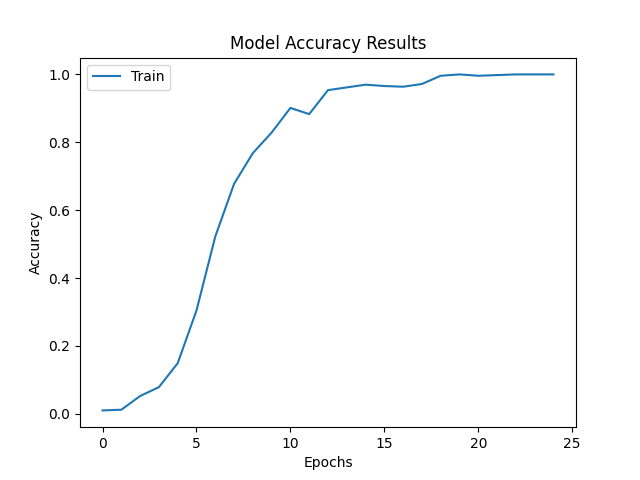

In [9]:
from IPython.display import Image

# display the PNG image
Image('/content/traintest/AccuracyCurve.png')

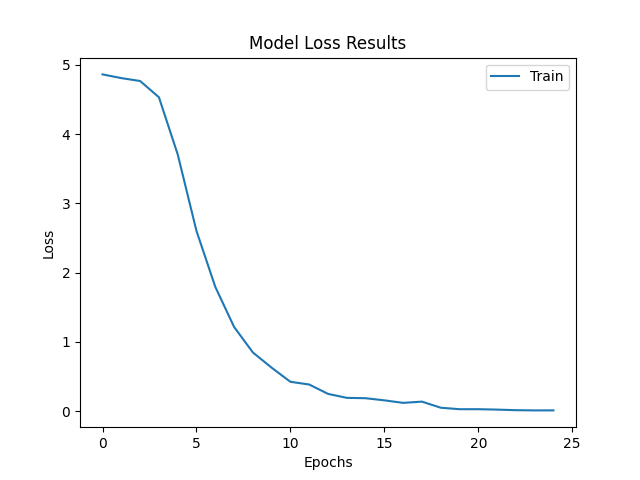

In [10]:
Image('/content/traintest/LossCurve.png')


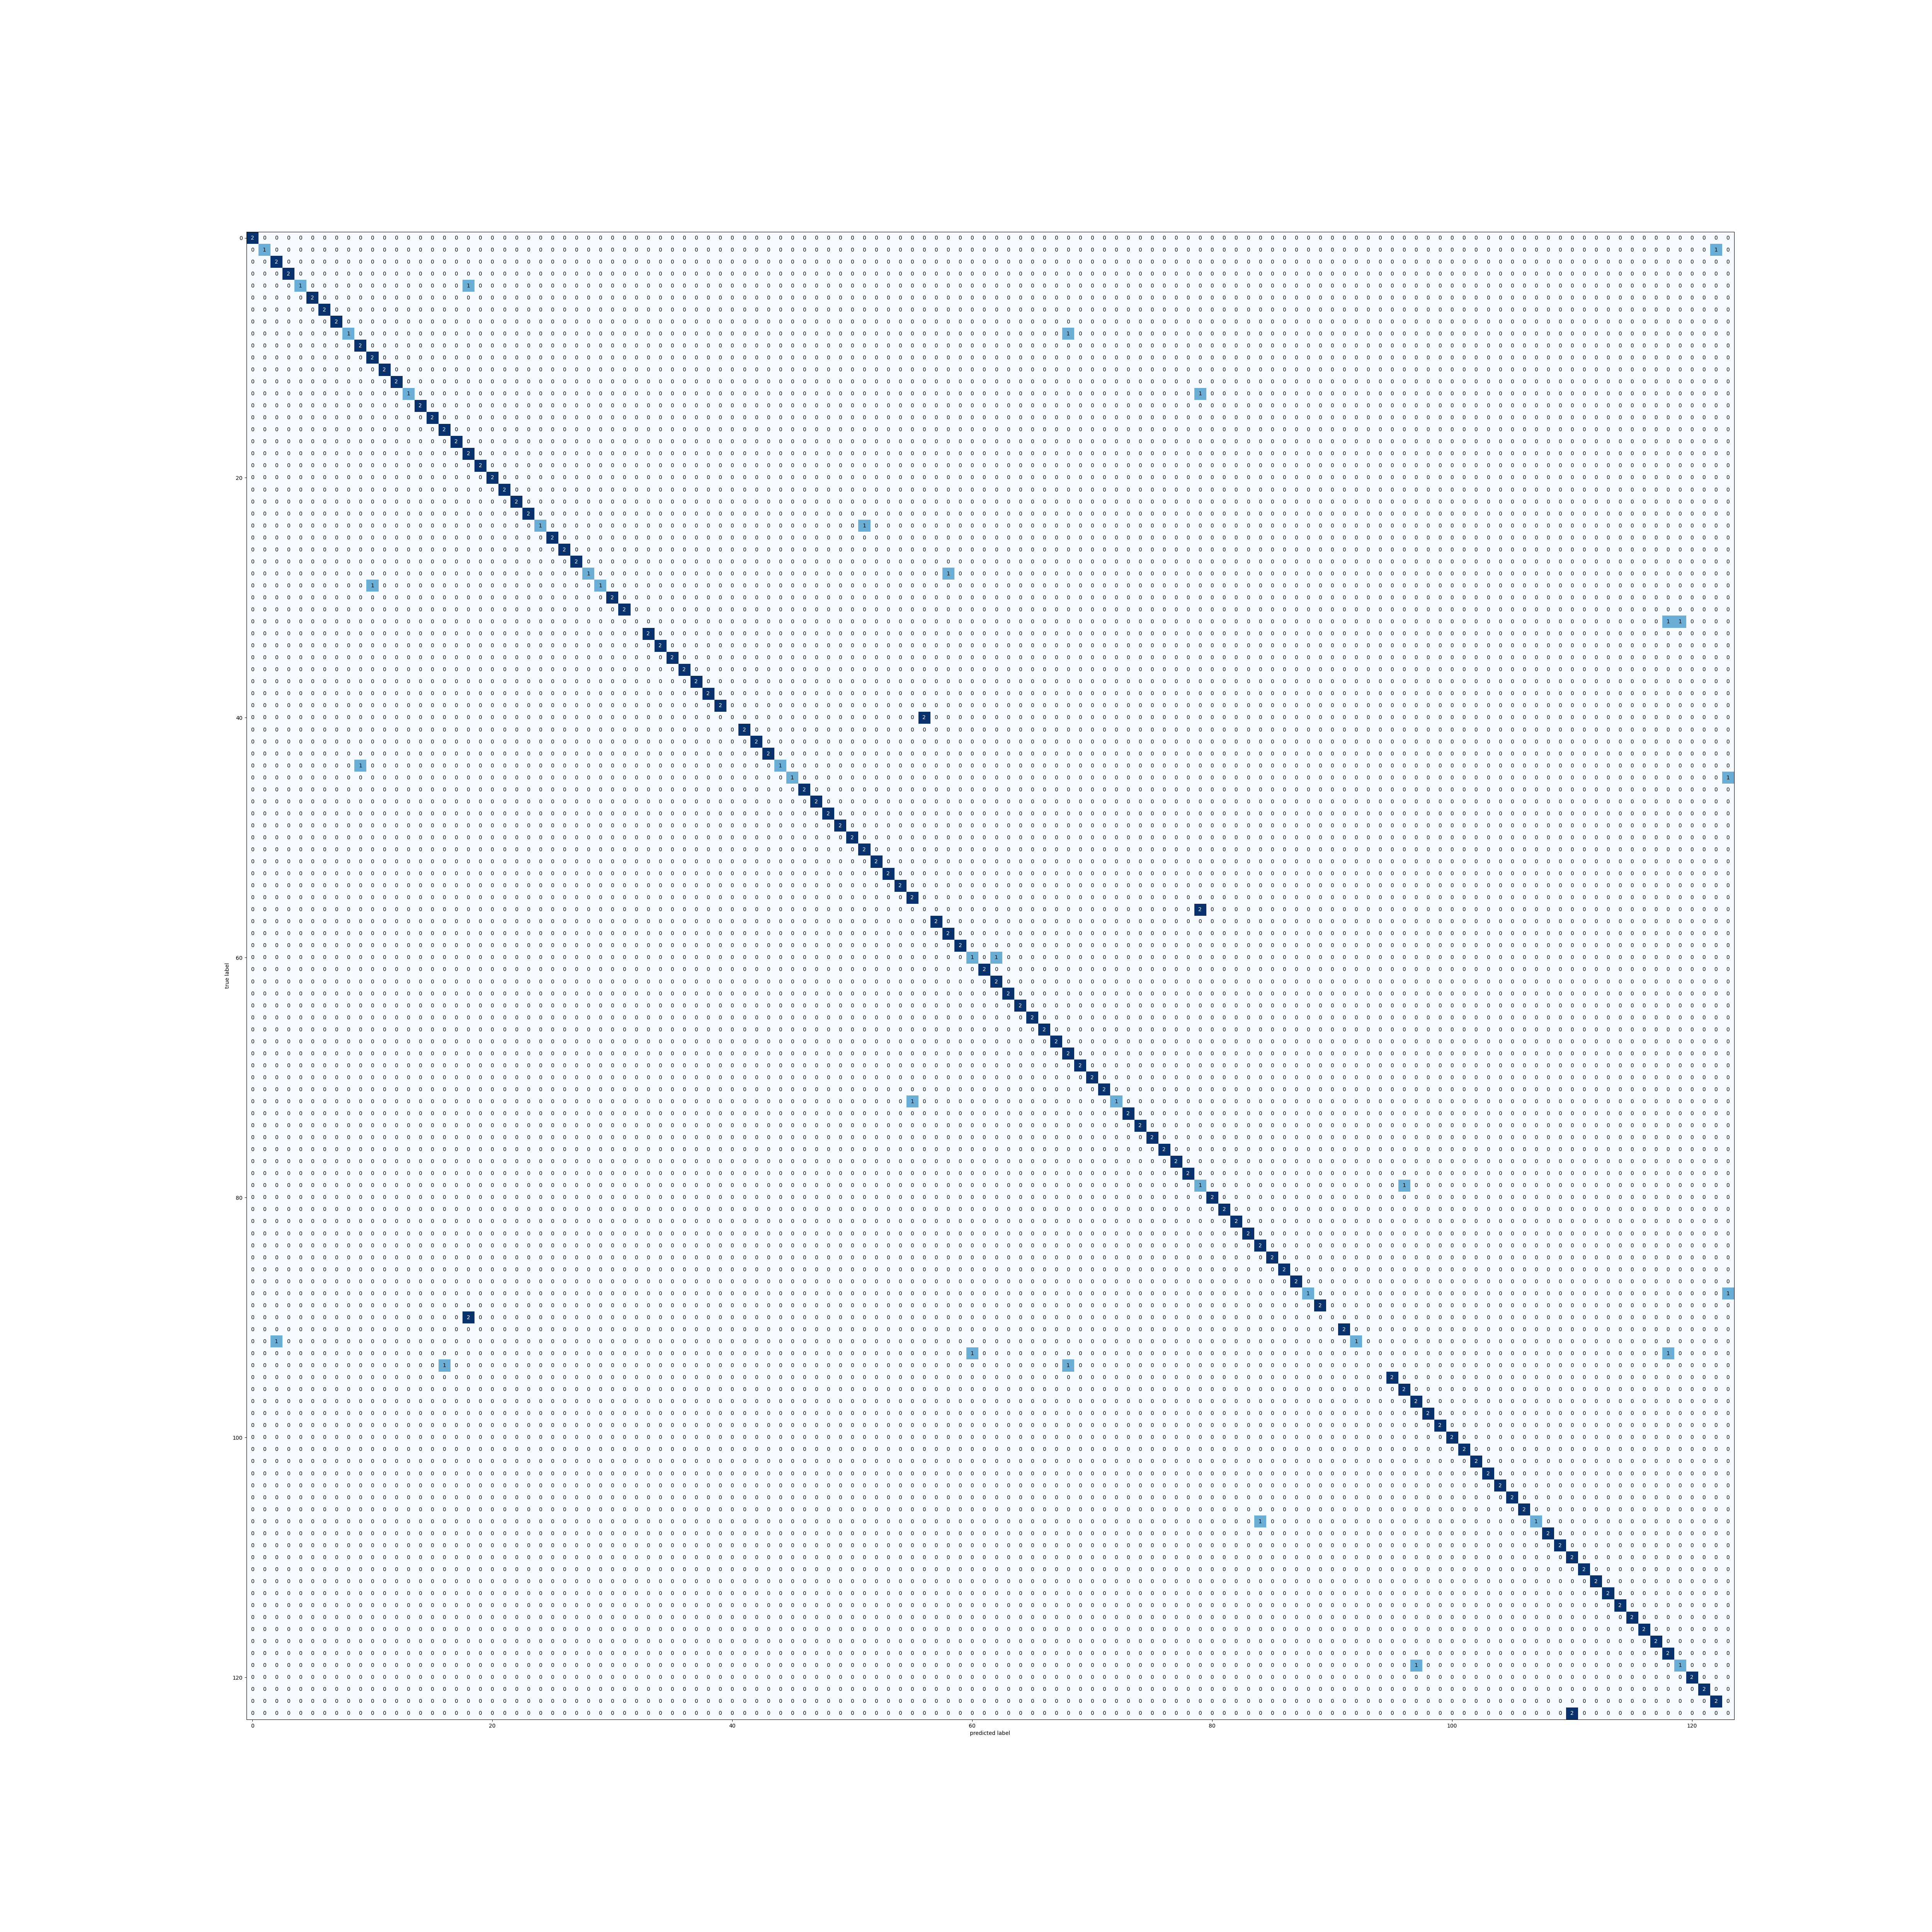

In [11]:

Image('/content/traintest/ConfusionMatrix.png')